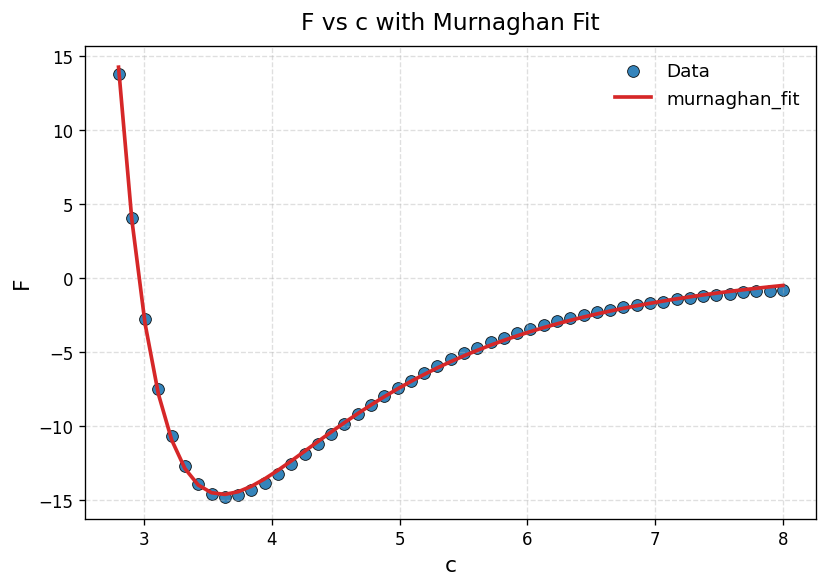

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ======================
# Load data
# ======================
data = np.loadtxt(r"E:\vasp_results\Cu_FCC.dat")
c, F = data[:, 0], data[:, 1]
V = c**3

E0_guess = min(F)
V0_guess = V[np.argmin(F)]
B0_guess = 1.0  
B0p_guess = 1.0

param_guess = [E0_guess, V0_guess, B0_guess, B0p_guess]

def birch_murnaghan_E(V, Eo, Vo, Bo, Bop):
    alpha = (Vo/V)**(2/3)
    beta = alpha - 1
    return Eo + (9*Vo*Bo/16)*(Bop * (beta)**3 + ((beta)**2)*(6 - 4*alpha ))

param, param_cov = curve_fit(birch_murnaghan_E, V, F, p0 = param_guess, maxfev=20000)
Eo, Vo, Bo, Bop = param

F_fit = Eo + (9*Vo*Bo/16)*(Bop*((Vo/V)**(2/3) - 1)**3 + (((Vo/V)**(2/3) - 1)**2)*(6 - 4*((Vo/V)**(2/3)) ) )

plt.figure(figsize=(7, 5), dpi=120)

# Scatter points (with nice look)
plt.scatter(c*4, F, color="#1f77b4", s=50, edgecolor="k", linewidth=0.5, alpha=0.9, label="Data")

# Fit line
plt.plot(c*4, F_fit, color="#d62728", linewidth=2.2, label="murnaghan_fit")

# Labels and style
plt.xlabel("c", fontsize=13)
plt.ylabel("F", fontsize=13)
plt.title("F vs c with Murnaghan Fit", fontsize=14, pad=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(frameon=False, fontsize=11)
plt.tight_layout()

plt.savefig("Cu_SC_Murnaghan.png", dpi=800)
plt.show()

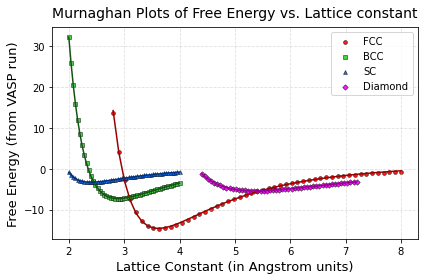

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data_FCC = np.loadtxt(r"E:\vasp_results\Cu_FCC.dat")
data_BCC = np.loadtxt(r"E:\vasp_results\Cu_BCC.dat")
data_SC = np.loadtxt(r"E:\vasp_results\Cu_SC.dat")
data_Diamond = np.loadtxt(r"E:\vasp_results\Cu_Diamond.dat")

c_FCC, F_FCC = data_FCC[:, 0], data_FCC[:, 1]
c_BCC, F_BCC = data_BCC[:, 0], data_BCC[:, 1]
c_SC, F_SC = data_SC[:, 0], data_SC[:, 1]
c_Diamond, F_Diamond = data_Diamond[:, 0], data_Diamond[:, 1]

V_FCC = c_FCC**3
V_BCC = c_FCC**3
V_SC = c_FCC**3
V_Diamond = c_Diamond**3

E0_guess_FCC = min(F_FCC)
E0_guess_BCC = min(F_BCC)
E0_guess_SC = min(F_SC)
E0_guess_Diamond = min(F_Diamond)

V0_guess_FCC = V_FCC[np.argmin(F_FCC)]
V0_guess_BCC = V_FCC[np.argmin(F_BCC)]
V0_guess_SC = V_FCC[np.argmin(F_SC)]
V0_guess_Diamond = V_FCC[np.argmin(F_Diamond)]


B0_guess = 1.0  
B0p_guess = 1.0

param_guess_FCC = [E0_guess_FCC, V0_guess_FCC, B0_guess, B0p_guess]
param_guess_BCC = [E0_guess_BCC, V0_guess_BCC, B0_guess, B0p_guess]
param_guess_SC = [E0_guess_SC, V0_guess_SC, B0_guess, B0p_guess]
param_guess_Diamond = [E0_guess_Diamond, V0_guess_Diamond, B0_guess, B0p_guess]

def birch_murnaghan_E(V, Eo, Vo, Bo, Bop):
    alpha = (Vo/V)**(2/3)
    beta = alpha - 1
    return Eo + (9*Vo*Bo/16)*(Bop * (beta)**3 + ((beta)**2)*(6 - 4*alpha ))

param_FCC, param_cov_FCC = curve_fit(birch_murnaghan_E, V_FCC, F_FCC, p0 = param_guess_FCC)
param_BCC, param_cov_BCC = curve_fit(birch_murnaghan_E, V_BCC, F_BCC, p0 = param_guess_BCC)
param_SC, param_cov_SC = curve_fit(birch_murnaghan_E, V_SC, F_SC, p0 = param_guess_SC)
param_Diamond, param_cov_Diamond = curve_fit(birch_murnaghan_E, V_Diamond, F_Diamond, p0 = param_guess_Diamond)

F_fit_FCC = birch_murnaghan_E(V_FCC, *param_FCC)
F_fit_BCC = birch_murnaghan_E(V_BCC, *param_BCC)
F_fit_SC = birch_murnaghan_E(V_SC, *param_SC)
F_fit_Diamond = birch_murnaghan_E(V_Diamond, *param_Diamond)

fig = plt.figure()
ax1 = fig.add_subplot(111)

# label markers s=square, o=circle, D=diamond, ^=uppertriangle
# Colors picked up from color picker tool online

ax1.plot(4*c_FCC, F_fit_FCC, color="#990000", linewidth=1.5)
ax1.plot(4*c_BCC, F_fit_BCC, color="#145214", linewidth=1.5)
ax1.plot(4*c_SC, F_fit_SC, color="#003380", linewidth=1.5)
ax1.plot(4*c_Diamond, F_fit_Diamond, color="#990099", linewidth=1.5)

ax1.scatter(4*c_FCC,F_FCC,s=15,c='#ff0000', edgecolor = 'k',linewidth = 0.5, alpha=0.9,marker = 'o' ,label = 'FCC')
ax1.scatter(4*c_BCC,F_BCC,s=15,c='#33cc33', edgecolor = 'k',linewidth = 0.5, alpha=0.9,marker = 's' ,label = 'BCC')
ax1.scatter(4*c_SC,F_SC,s=15,c='#0066ff', edgecolor = 'k',linewidth = 0.5, alpha=0.9,marker = '^' ,label = 'SC')
ax1.scatter(4*c_Diamond,F_Diamond,s=15,c='#ff00ff', edgecolor = 'k',linewidth = 0.5, alpha=0.9,marker = 'D' ,label = 'Diamond')

plt.xlabel("Lattice Constant (in Angstrom units)", fontsize=13)
plt.ylabel("Free Energy (from VASP run)", fontsize=13)
plt.title("Murnaghan Plots of Free Energy vs. Lattice constant", fontsize=14, pad=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

plt.legend(loc='upper right')

plt.savefig("All_Plots_Murnaghan.png", dpi=800)
plt.show()



In [6]:
a=min(F_fit_FCC)
b=c_FCC[np.argmin(F_fit_FCC)]
print('latticemin = ', 4*b)

latticemin =  3.632
